In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression


In [3]:
# Load the CSV files
df_purchase = pd.read_csv("User_product_purchase_details_p2.csv")
df_demo = pd.read_csv("user_demographics.csv")

# View basic info
print(df_purchase.head())
print(df_demo.head())


   User_ID Product_ID City_Category Stay_In_Current_City_Years  \
0  1000001  P00069042             A                          2   
1  1000001  P00248942             A                          2   
2  1000001  P00087842             A                          2   
3  1000001  P00085442             A                          2   
4  1000002  P00285442             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                 NaN                 NaN   
1               0                   1                 6.0                14.0   
2               0                  12                 NaN                 NaN   
3               0                  12                14.0                 NaN   
4               0                   8                 NaN                 NaN   

   Purchase  
0      8370  
1     15200  
2      1422  
3      1057  
4      7969  
   User_ID Gender    Age  Occupa

In [4]:
df = pd.merge(df_purchase, df_demo, on="User_ID", how="left")
print(df.shape)


(550068, 12)


In [5]:
# Handle missing values
df = df.fillna(0)

# Drop columns not useful for ML
df = df.drop(["Product_ID"], axis=1)  # as per problem statement


In [6]:
df["High_Value_Purchase"] = (df["Purchase"] >= 10000).astype(int)

# Drop raw purchase column
df = df.drop(["Purchase"], axis=1)


In [7]:
# One-hot encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)

print(df.head())


   User_ID  Marital_Status  Product_Category_1  Product_Category_2  \
0  1000001               0                   3                 0.0   
1  1000001               0                   1                 6.0   
2  1000001               0                  12                 0.0   
3  1000001               0                  12                14.0   
4  1000002               0                   8                 0.0   

   Product_Category_3  Occupation  High_Value_Purchase  City_Category_B  \
0                 0.0          10                    0            False   
1                14.0          10                    1            False   
2                 0.0          10                    0            False   
3                 0.0          10                    0            False   
4                 0.0          16                    0            False   

   City_Category_C  Stay_In_Current_City_Years_1  \
0            False                         False   
1            False      

In [8]:
X = df.drop("High_Value_Purchase", axis=1)
y = df["High_Value_Purchase"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
log = LogisticRegression(max_iter=2000)
log.fit(X_train_scaled, y_train)

# Predict
pred_lr = log.predict(X_test_scaled)

# Evaluation
print("LR Accuracy:", accuracy_score(y_test, pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))


LR Accuracy: 0.7660115985238243
Confusion Matrix:
 [[64692  7414]
 [18328 19580]]


In [11]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # Output layer (binary)
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test_scaled, y_test)
print("MLP Accuracy:", acc)


Epoch 1/15


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 811us/step - accuracy: 0.8333 - loss: 0.3885
Epoch 2/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 11s 825us/step - accuracy: 0.8811 - loss: 0.2946
Epoch 3/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 905us/step - accuracy: 0.8855 - loss: 0.2831
Epoch 4/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 876us/step - accuracy: 0.8897 - loss: 0.2738
Epoch 5/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 870us/step - accuracy: 0.8932 - loss: 0.2691
Epoch 6/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 848us/step - accuracy: 0.8941 - loss: 0.2668
Epoch 7/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 854us/step - accuracy: 0.8947 - loss: 0.2653
Epoch 8/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 864us/step - accuracy: 0.8955 - loss: 0.2640
Epoch 9/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 887us/step - accuracy: 0.8960 - loss: 0.2625
Epoch 10/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 11s 830us/step - accuracy: 0.8961 - loss: 0.2614
Epoch 11/15
13752/13752 ━━━━━━━━━━━━━━━━━━━━ 12s 896us/step - accuracy: 0.8961 -

3438/3438 ━━━━━━━━━━━━━━━━━━━━ 2s 523us/step


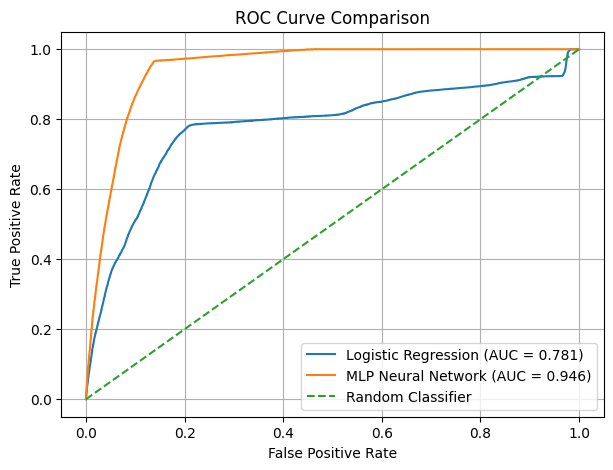

In [12]:
# ==== ROC CURVE ====
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Logistic Regression ---
# Get prediction probabilities
y_prob_lr = log.predict_proba(X_test_scaled)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# --- MLP Neural Network ---
# Get probabilities (for sigmoid output)
y_prob_mlp = model.predict(X_test_scaled).ravel()

fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# ---- PLOT BOTH ROC CURVES ----
plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP Neural Network (AUC = {auc_mlp:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# ---------- Logistic Regression ----------
precision_lr = precision_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)

print("\nLogistic Regression:")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1 Score:  {f1_lr:.4f}")


# ---------- MLP Neural Network ----------
# First convert probabilities to class predictions (0 / 1)
pred_mlp = (y_prob_mlp >= 0.5).astype(int)

precision_mlp = precision_score(y_test, pred_mlp)
recall_mlp = recall_score(y_test, pred_mlp)
f1_mlp = f1_score(y_test, pred_mlp)

print("\nMLP Neural Network:")
print(f"Precision: {precision_mlp:.4f}")
print(f"Recall:    {recall_mlp:.44}")
print(f"F1 Score:  {f1_mlp:.4f}")



Logistic Regression:
Precision: 0.7253
Recall:    0.5165
F1 Score:  0.6034

MLP Neural Network:
Precision: 0.7883
Recall:    0.96040413633006227467348026038962416350841522
F1 Score:  0.8659
